In [1]:
import os
import sys
sys.path.append("../")

In [2]:
import pandas as pd
import time
from plugins.interfaces.diagnostics import EPICSImageDiagnostic, ROI

screen_name = "13ARV1"
save_image_location = "../run_data/2023_11_17/"
TESTING = False
DYG14_IP = 1
DYG15_IP = 2
charge_pvs = []

dyg14_roi = ROI(
    ymin=280, ymax=1000, xmin=480, xmax=1150
)
dyg15_roi = ROI(
    ymin=700, ymax=1500, xmin=300, xmax=900
)

DYG14 = EPICSImageDiagnostic(
    screen_name=screen_name,
    resolution_suffix=None,
    #roi=dyg14_roi,
    extra_pvs=charge_pvs,
    save_image_location=save_image_location,
    testing=TESTING,
    #target_charge=1.0,
    #target_charge_pv="ICT1"
)

DYG15 = EPICSImageDiagnostic(
    screen_name=screen_name,
    resolution_suffix=None,
    #roi=dyg15_roi,
    extra_pvs=charge_pvs,
    save_image_location=save_image_location,
    testing=TESTING
)

def set_camera(ip_address, testing=False):
    if not testing:
        from epics import caput
        # stop the current camera
        caput("13ARV1:cam1:Acquire", 0)
        time.sleep(1)
        # set the new camera IP address
        caput("13ARV1:cam1:GC_SetCameraName", ip_address)
        time.sleep(1)
        # start the new camera
        caput("13ARV1:cam1:Acquire", 1)

        time.sleep(10)


displaying image
fitting image


{'Cx': nan,
 'Cy': nan,
 'Sx': nan,
 'Sy': nan,
 'bb_penalty': nan,
 'total_intensity': 25738371152.0,
 'log10_total_intensity': 10.410581059193014}

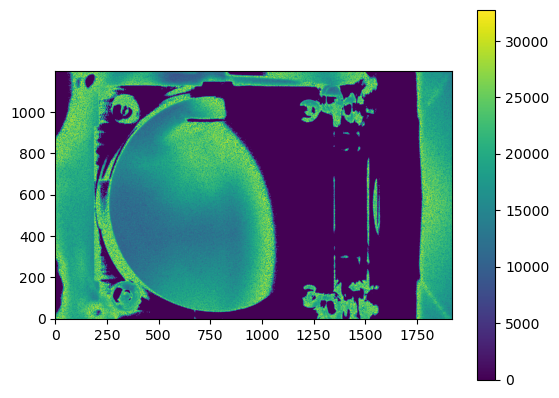

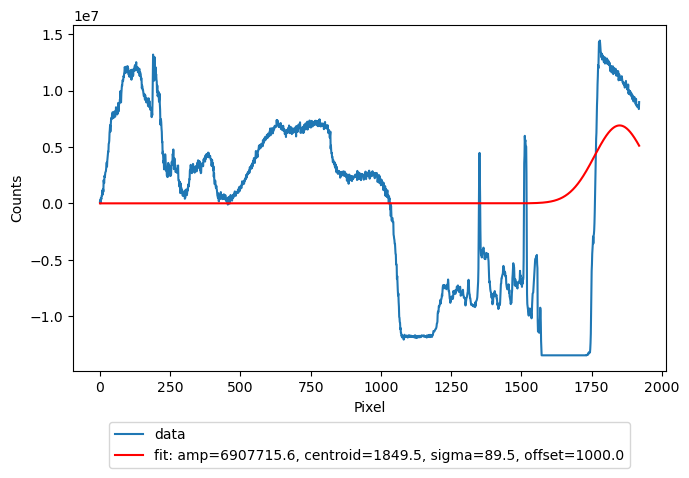

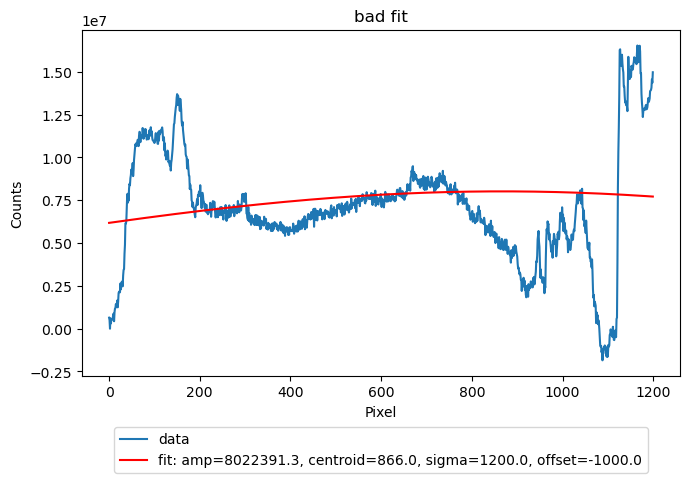

CA.Client.Exception...............................................
    Context: "awa5:5064"
    Source File: ../cac.cpp line 1237
    Current Time: Fri Dec 01 2023 11:19:20.494110917
..................................................................


In [5]:
set_camera("192.168.2.111")
DYG14.test_measurement()

displaying image
fitting image


{'Cx': nan,
 'Cy': nan,
 'Sx': nan,
 'Sy': nan,
 'bb_penalty': nan,
 'total_intensity': 16426273168.0,
 'log10_total_intensity': 10.215539040844186}

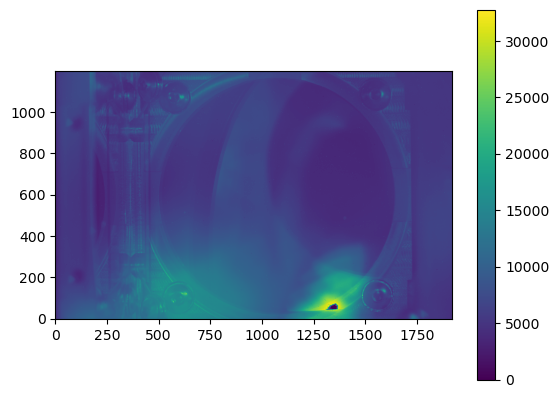

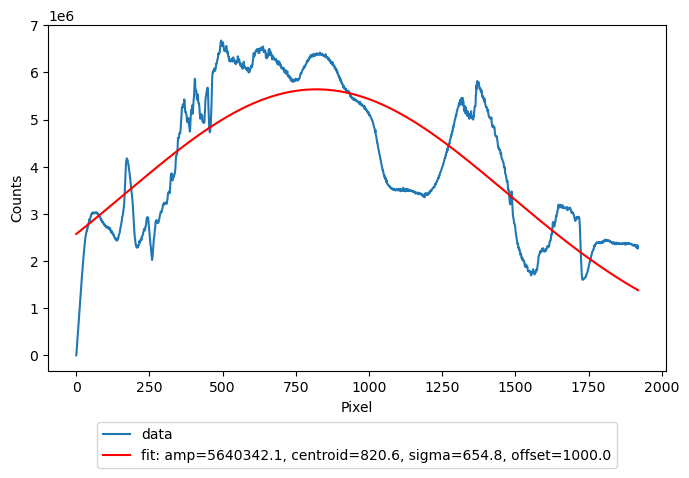

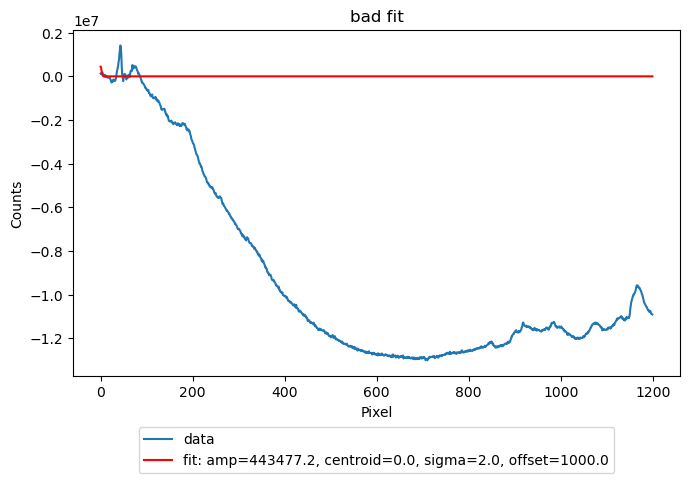

In [4]:
set_camera("192.168.2.139")
DYG15.test_measurement()